<a href="https://colab.research.google.com/github/sanjus1ngh/CIFAR-MODEL/blob/main/cifar_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing Libraries and Load Dataset


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import datasets, layers,models
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten


#Now the dataset

from keras.datasets import cifar10




In [ ]:
# Load the dateset in Train and test set
(X_train, Y_train), (X_test, Y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 6s 0us/step


(50000, 32, 32, 3)

In [ ]:
 X_test.shape

(10000, 32, 32, 3)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

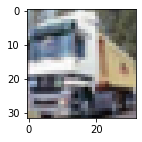

In [ ]:
plt.figure(figsize=(15,2))
plt.imshow(X_train[1])

In [ ]:
#normalising the data
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
#Build simple artificial neural network for image classification

In [ ]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, Y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 127s 80ms/step - loss: 1.8129 - accuracy: 0.3519
Epoch 2/5
1563/1563 [==============================] - 114s 73ms/step - loss: 1.6241 - accuracy: 0.4277
Epoch 3/5
1563/1563 [==============================] - 112s 72ms/step - loss: 1.5427 - accuracy: 0.4572
Epoch 4/5
1563/1563 [==============================] - 112s 72ms/step - loss: 1.4822 - accuracy: 0.4777
Epoch 5/5
1563/1563 [==============================] - 110s 71ms/step - loss: 1.4327 - accuracy: 0.4952


In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(Y_test, y_pred_classes))

313/313 [==============================] - 9s 29ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.53      0.61      0.57      1000
           1       0.71      0.43      0.54      1000
           2       0.35      0.40      0.37      1000
           3       0.39      0.15      0.22      1000
           4       0.33      0.58      0.42      1000
           5       0.34      0.51      0.41      1000
           6       0.68      0.24      0.36      1000
           7       0.58      0.49      0.53      1000
           8       0.71      0.50      0.58      1000
           9       0.46      0.70      0.56      1000

    accuracy                           0.46     10000
   macro avg       0.51      0.46      0.46     10000
weighted avg       0.51      0.46      0.46     10000



In [ ]:
#building  a convolutional neural network to train our images

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, Y_train, epochs=10)

In [ ]:
cnn.evaluate(X_test,Y_test)

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

In [ ]:
Y_test[:5]

In [ ]:
plot_sample(X_test, Y_test,3)

In [ ]:
classes[y_classes[3]]